# Machine Learning - Task F - SOLUTIONS

*M Kundegorski*, Fjelltopp Ltd., University of Glasgow, 2019-2020


## The Task (c.f. Task B)

In an experiment we were able to image lots of different types of cells. These cells are sparse so we were easily able to segment them, find their bounding box and create a database of images each containing a single cell. We then convinced a PhD student to go through and manually categorise our cells. We want to use regression to be able to automatically categorise new, unlabelled cells from future experiments.

To do this, we will:
1. Calculate Histogram of Gradient (HoG) features for our images.
2. Use Support Vector Machines (SVM) for classification.
3. Use training data to fit the regression and test data to check how well our model works.
4. Plot and understand a confusion matrix for classification.
5. Advanced: Use visual inspection to understand what might cause problems for classification models.
6. Advanced: Repeat using Random Forests.

## Task F.1

Run the following two cells to set-up and visualise the data. Feel free to change parameters as you explore the system. We suggest you use the same settings as for Task B so that you can compare the different methods.

count     1200
unique       3
top          1
freq       416
Name: class, dtype: int64

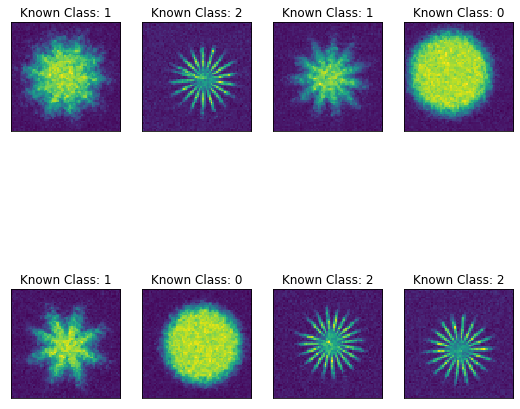

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cv2  # OpenCV - we will use their HoG feature descriptor and their SVM
from sklearn import model_selection

# Utils is a custom module written to simplify these tutorials
# You do not need to understand these codes for this practical
from utils.practice_data import generateBlobsData  # this loads data into a DataFrame
from utils.practice_data import showBlobs  # this allows quick visualisation of the data

# Generate a pandas DataFrame of data
# with a column 'class', i.e. the categry a cell belongs to,
# and a column 'raw_data' which hold the NumPy array/image
imageDir = './assets/simple_blobs/'
number_of_samples = 1200
image_size = 64  # in pixels
number_of_classes = 3 #2-6 - normal blobs. 7-11 more difficult
problem = generateBlobsData(imageDir, number_of_classes, number_of_samples, image_size, noiseSize=20)

#Visualise the data
display(problem.loc[:,'class'].describe())  # describe classes; note the number of unique classes
showBlobs(problem.sample(10))  # plots the images with their class above.

## Task F.2

First we need to 'wrangle' our data into appropriate forms. Run the cell below to do this.

In [2]:
# Data wrangling
x = np.stack(problem.loc[:,'raw_data'])  # Stack all images into an array 'x'
y = problem.loc[:,'class'].values.astype(int)  # Convert classes to int

# Split data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

The following code cell calculates and displace HoG descriptors. Run the cell. Don't worry to much about the details now but this tutorial will help you understand later: https://www.learnopencv.com/histogram-of-oriented-gradients/. These features are what we'll use for classification during this task.

In [3]:
# In this task we will use HoG descriptor from OpenCV.
# You can find horrible documentation at https://docs.opencv.org/4.1.2/d5/d33/structcv_1_1HOGDescriptor.html#a5c8e8ce0578512fe80493ed3ed88ca83

# HoG parameters
winSize = (32,32)
blockSize = (8,8)
blockStride = (8,8)
cellSize = (4,4)
bins = 9

# Initialise HoD Descriptor
# This creates a weird HoG object
# We will use this to calculate descriptors for individual images
hog_cv = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, bins)

# Extract HoG Features for Each Cell
x_hog = []
for cell in x:
    descriptor = hog_cv.compute(cell)  # calculate descriptor for cell
    x_hog.append(descriptor)  # append to our list

x_hog = np.squeeze(np.array(x_hog))  # a little shape wrangling (drops a singleton dimension left by the descriptor)

# Split data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_hog, y, test_size=0.2, random_state=0)

## Task F.3

The following code cell constructs and trains a [scikit learn SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) for classifying our cells in our images.

Fill in the blanks (`____`) and run the cell.

Note the similarity to the code for Task B.

In [4]:
from sklearn import svm
from sklearn import metrics

# Initialise SVM
svm = svm.SVC()

# 'Fit' with training data
# svm.fit(____, ____)
svm.fit(x_train, y_train)

# Predict the classes for our test data
# y_predict = svm.predict(____)
y_predict = svm.predict(x_test)

# Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(____, ____))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9958333333333333


## Task F.4

Using your codes from Task B, plot the True/False rates for our SVM prediction.

Correct classification of SVM classifier: 99.58%


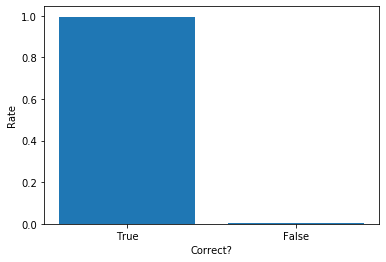

In [5]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

TF = y_test==y_predict  # create True/False list to see how often we're correct
trueRate = TF.sum()/TF.size  # as True==1, the sum is the same as the count (as percent)
falseRate = (TF.size - TF.sum())/TF.size  # and everything else is False (as percent)

print('Correct classification of SVM classifier: {0:.2%}'.format(trueRate))

axis.bar(['True','False'],[trueRate,falseRate])
axis.set_ylabel('Rate')
axis.set_xlabel('Correct?')

plt.show()

## Task F.5

The bar chart above is a great way to see if a classifier is working well with only a few groups, but another way of representing the success of your classified is a 'confusion matrix' - and this will work much better with larger numbers of classes.

Run the following cell to create a confusion matrix for your SVM classifier.

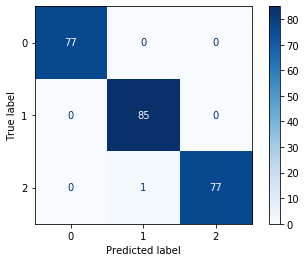

In [6]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

metrics.plot_confusion_matrix(svm, x_test, y_test, cmap=plt.cm.Blues, ax=axis) #reqiures sklearn >= 0.22

plt.show()

## Advanced Task F.6

Change the number of cell classes in our training data from 2 to a number between 2 and 6 (inclusive). Rerun the HoG and SVM (all cells above), how does the model deal with more classes.

Repeat for a number between 7 and 11 (inclusive). Look at the plotted sample data, can you see why classifiers may not be able to distinguish certain categories?

## Advanced Task F.7

Run the cells below to see the same experiment done using [scikit-learn Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier).

Add cells plotting the True/False rate and confusion matrix for random forest classification.

Repeat task F.6 for Random Forests. Which performs better - SVM or Random Forests?

In [7]:
from sklearn import ensemble

# Initialise Random Forest
rf = ensemble.RandomForestClassifier(n_estimators=100)

# 'Fit' with training data
# rf.fit(____, ____)
rf.fit(x_train, y_train)

# Predict the classes for our test data
# y_predict = rf.predict(____)
y_predict = rf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(____, ____))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9916666666666667


Correct classification of Random Forest classifier: 99.17%


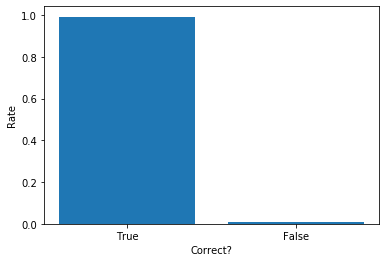

In [8]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

TF = y_test==y_predict  # create True/False list to see how often we're correct
trueRate = TF.sum()/TF.size  # as True==1, the sum is the same as the count (as percent)
falseRate = (TF.size - TF.sum())/TF.size  # and everything else is False (as percent)

print('Correct classification of Random Forest classifier: {0:.2%}'.format(trueRate))

axis.bar(['True','False'],[trueRate,falseRate])
axis.set_ylabel('Rate')
axis.set_xlabel('Correct?')

plt.show()

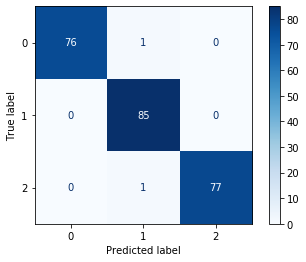

In [9]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

metrics.plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues, ax=axis)

plt.show()